Week 06 Assignment <br/>
Submitted by: Chris Panican<br>
Intro to Machine Learning CSc 55929<br>
Prof. Erik Grimmelmann<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()
y = iris.target

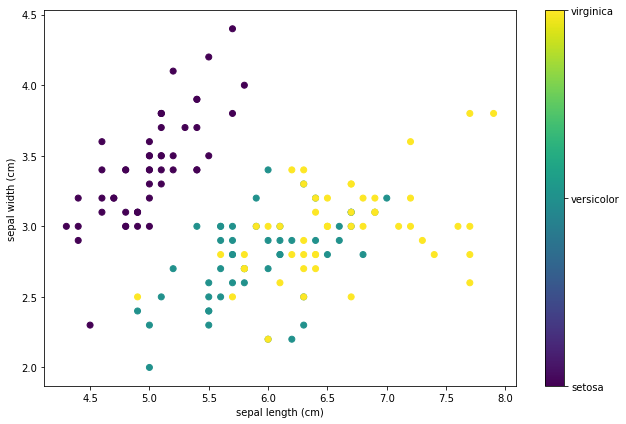

In [2]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(9, 6))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [3]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X = iris.data[:, [0,1,2,3]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)
# X_combined_std = np.vstack((X_train_std, X_test_std))
# y_combined = np.hstack((y_train, y_test))

In [4]:
# svmm = svm.SVC(kernel='sigmoid', gamma=10.0, C=1.0, random_state=1)
# svmm.fit(X_train_std, y_train)

# predict = svmm.predict(X_test_std)
# print(predict)
# print(y_test)

# svmm.score(X_test_std, y_test)

# # this formatter will label the colorbar with the correct target names
# formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

# plt.figure(figsize=(9, 6))
# plt.scatter(iris.data[:, predict], iris.data[:, y_test], c=iris.target)
# plt.colorbar(ticks=[0, 1, 2], format=formatter)
# plt.xlabel(iris.feature_names[x_index])
# plt.ylabel(iris.feature_names[y_index])

# plt.tight_layout()
# plt.show()

In [5]:
results1 = []  # This array will show results from part 1 of this assignment (accurate results)
results2 = []  # This array will show results from part 2 of this assignment (less-accurate results)

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [7]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Part 1: In this section, I will try to find the most accurate values for each kernel using specific gamma, C and degree values. (Best possible parameters)

In [8]:
def svm_comparison(f1, f2):
    X = iris.data[:, [f1, f2]]
    
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='sigmoid', gamma=0.01, C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('Linear kernel',
              'Sigmoid kernel',
              'RBF kernel',
              'Poly3 kernel')
    
    # Feature Titles
    IrisF=("sepal length in cm", 
           "sepal width in cm", 
           "petal length in cm", 
           "petal width in cm")

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(14,10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(IrisF[f1])
        ax.set_ylabel(IrisF[f2])
        ax.set_xticks(())
        ax.set_yticks(())
        title2 = "%s - Accuracy: %s" % (title,  round(clf.score(X, y), 2))
        ax.set_title(title2)
        
        clf.score(X,y)
        results1.append((f1, f2, title, round(clf.score(X, y), 2)))

    
    plt.show()

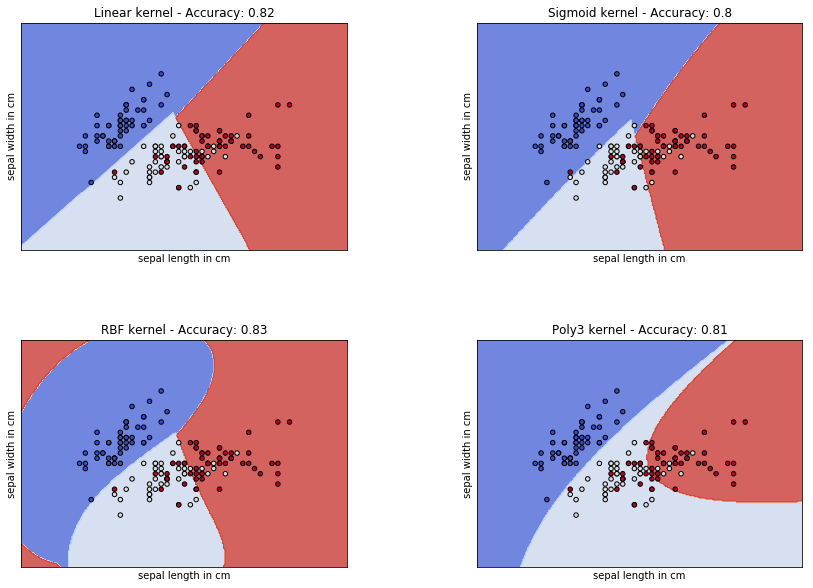

In [9]:
# Feature 0 and feature 1
svm_comparison(0,1)

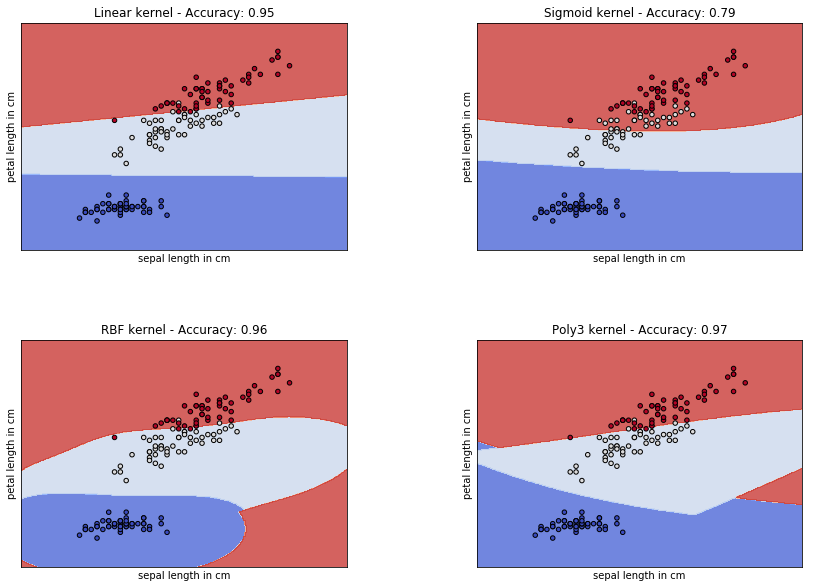

In [10]:
# Feature 0 (Selpal Length) and feature 2 selpal width
svm_comparison(0,2)

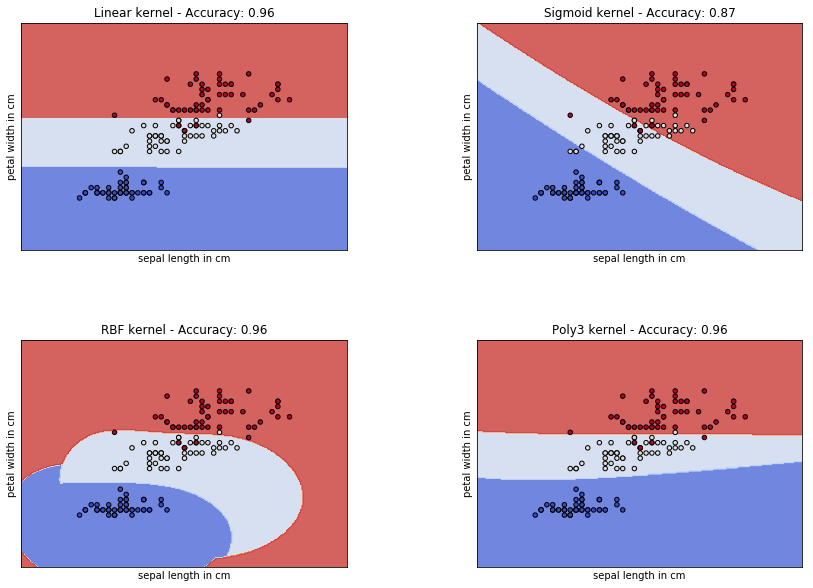

In [11]:
# Feature 0 and feature 3
svm_comparison(0,3)

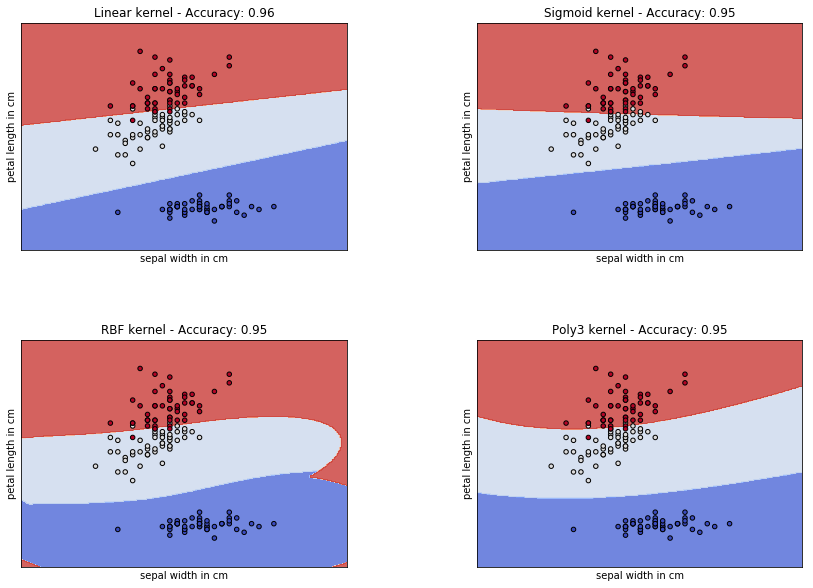

In [12]:
# Feature 0 and feature 2
svm_comparison(1,2)

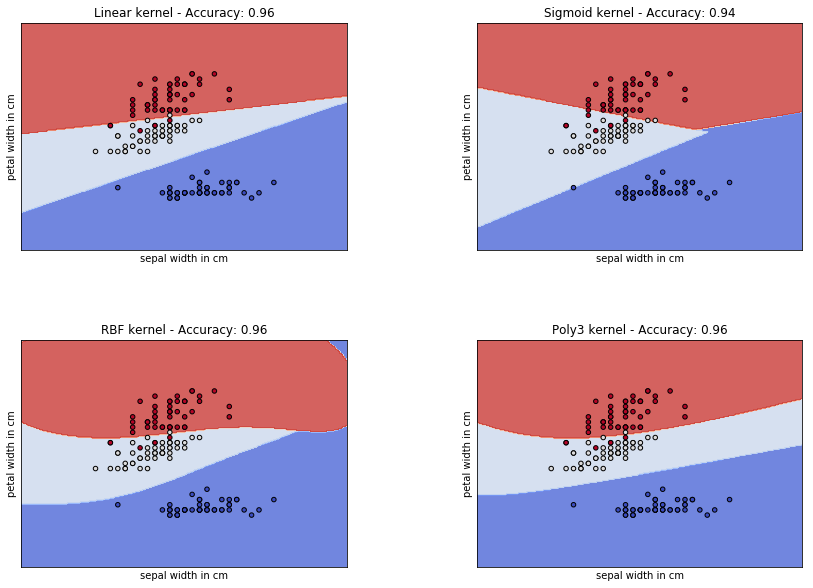

In [13]:
# Feature 0 and feature 3
svm_comparison(1,3)

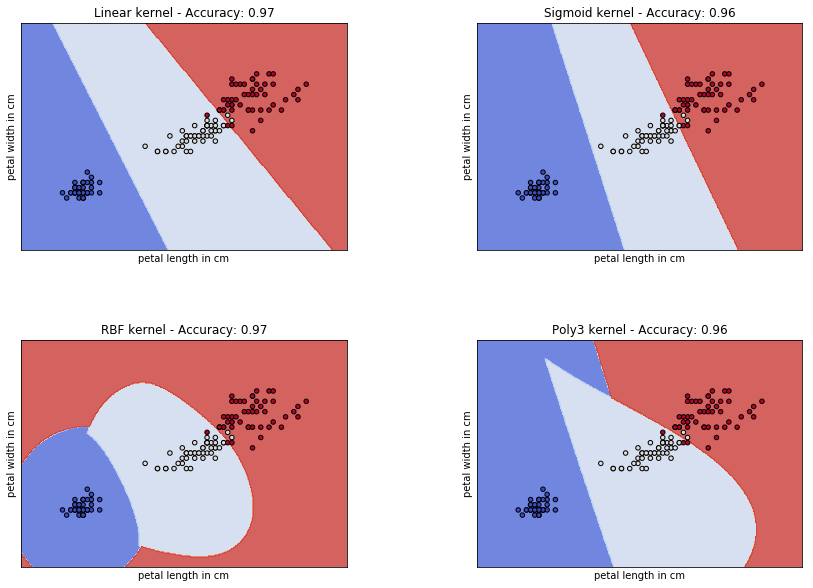

In [14]:
# Feature 0 and feature 3
svm_comparison(2,3)

In [15]:
print("Feature 1 | Feature 2 |        Title         | Score ")

for f1, f2, title, score in results1:
    print("    {:<11} {:<10} {:<20} {}".format(f1, f2, title, score))

Feature 1 | Feature 2 |        Title         | Score 
    0           1          Linear kernel        0.82
    0           1          Sigmoid kernel       0.8
    0           1          RBF kernel           0.83
    0           1          Poly3 kernel         0.81
    0           2          Linear kernel        0.95
    0           2          Sigmoid kernel       0.79
    0           2          RBF kernel           0.96
    0           2          Poly3 kernel         0.97
    0           3          Linear kernel        0.96
    0           3          Sigmoid kernel       0.87
    0           3          RBF kernel           0.96
    0           3          Poly3 kernel         0.96
    1           2          Linear kernel        0.96
    1           2          Sigmoid kernel       0.95
    1           2          RBF kernel           0.95
    1           2          Poly3 kernel         0.95
    1           3          Linear kernel        0.96
    1           3          Sigmoid kernel     

## Part 2: In this section, I will show how inaccurate plots and how it affects scores for each case. (Worst possible parameters)

In [16]:
def svm_comparison2(f1, f2):
    X = iris.data[:, [f1, f2]]
    
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', gamma=0.00001, C=0.001),
              svm.SVC(kernel='sigmoid', gamma=0.1, C=C),
              svm.SVC(kernel='rbf', gamma=0.01, C=C),
              svm.SVC(kernel='poly', gamma=0.0001, degree=2, C=C))
    
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('Linear kernel',
              'Sigmoid kernel',
              'RBF kernel',
              'Poly3 kernel')
    
    # Feature Titles
    IrisF=("sepal length in cm", 
           "sepal width in cm", 
           "petal length in cm", 
           "petal width in cm")

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(14,10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(IrisF[f1])
        ax.set_ylabel(IrisF[f2])
        ax.set_xticks(())
        ax.set_yticks(())
        title2 = "%s - Accuracy: %s" % (title,  round(clf.score(X, y), 2))
        ax.set_title(title2)
        
        clf.score(X,y)
        results2.append((f1, f2, title, round(clf.score(X, y), 2)))

    
    plt.show()

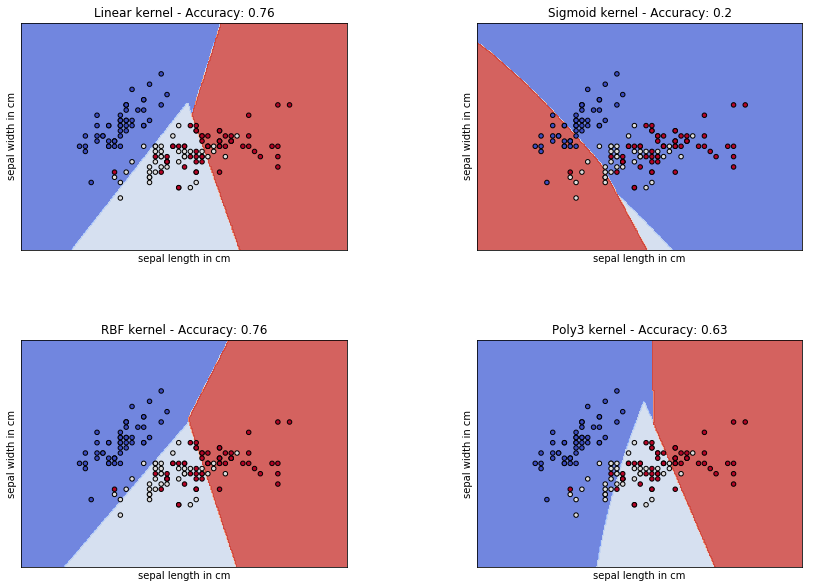

In [17]:
svm_comparison2(0,1)

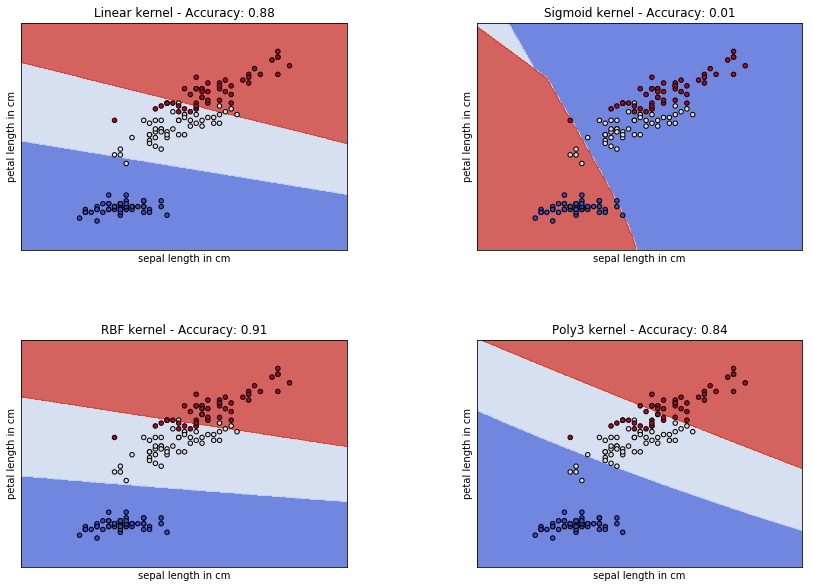

In [18]:
svm_comparison2(0,2)

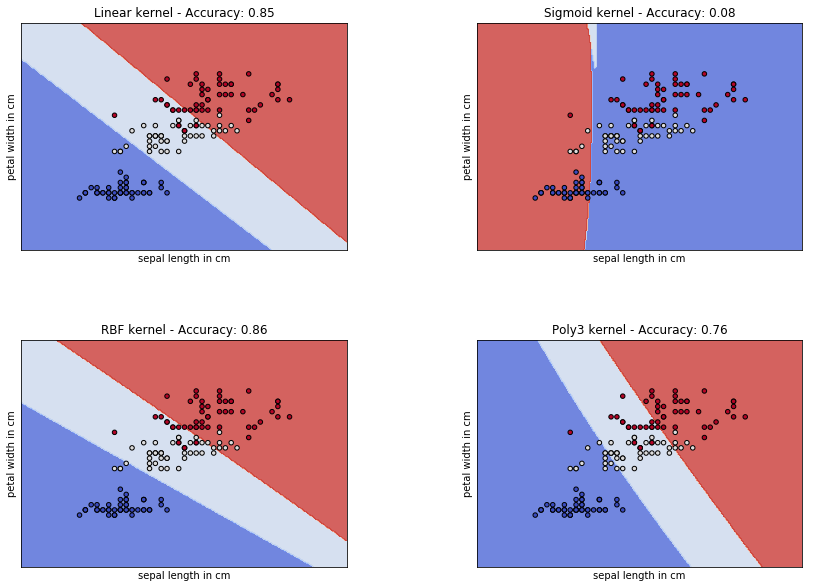

In [19]:
svm_comparison2(0,3)

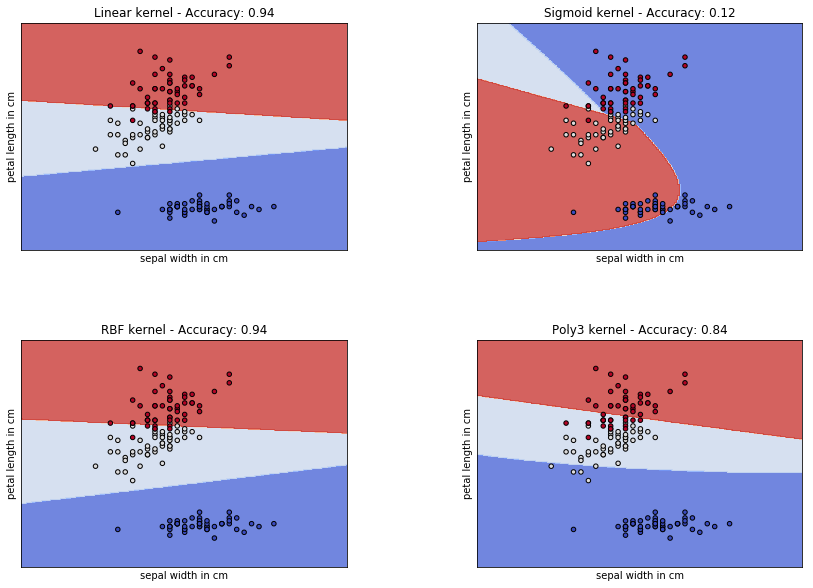

In [20]:
svm_comparison2(1,2)

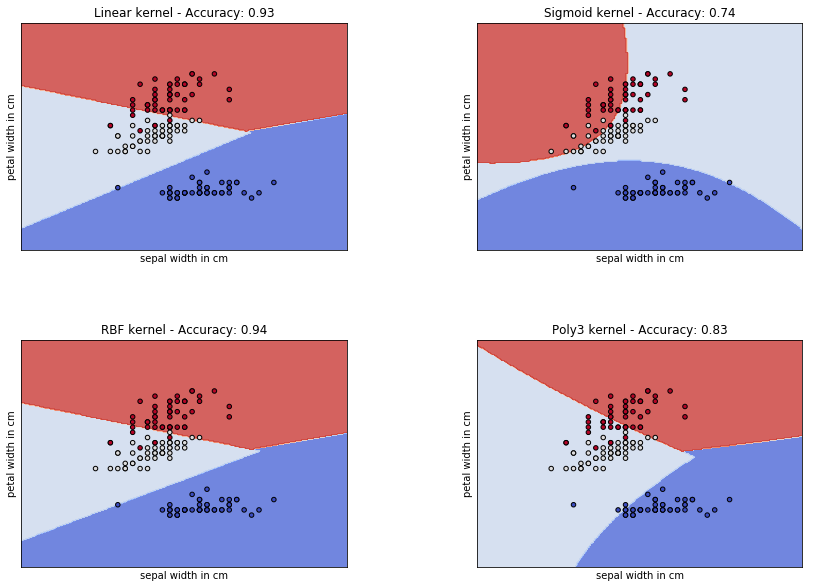

In [21]:
svm_comparison2(1,3)

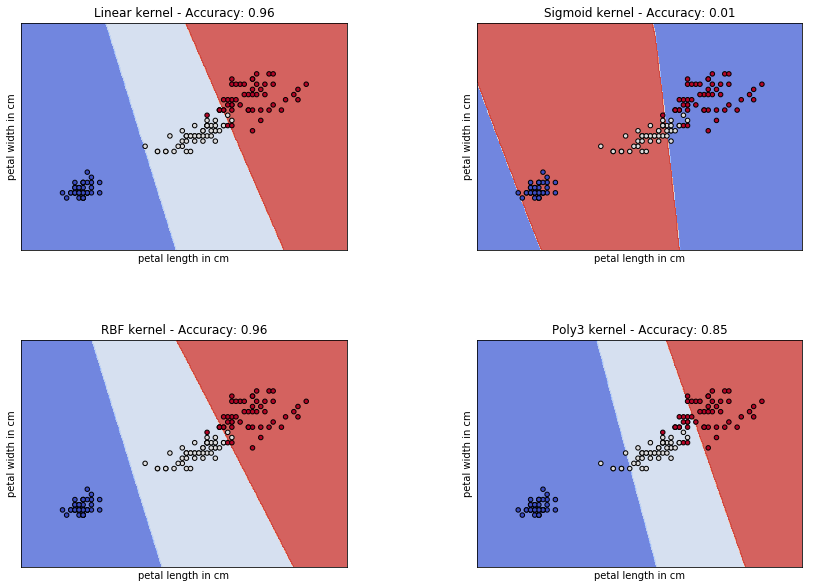

In [22]:
svm_comparison2(2,3)

In [23]:
print("Feature 1 | Feature 2 |        Title         | Score ")

for f1, f2, title, score in results2:
    print("    {:<11} {:<10} {:<20} {}".format(f1, f2, title, score))

Feature 1 | Feature 2 |        Title         | Score 
    0           1          Linear kernel        0.76
    0           1          Sigmoid kernel       0.2
    0           1          RBF kernel           0.76
    0           1          Poly3 kernel         0.63
    0           2          Linear kernel        0.88
    0           2          Sigmoid kernel       0.01
    0           2          RBF kernel           0.91
    0           2          Poly3 kernel         0.84
    0           3          Linear kernel        0.85
    0           3          Sigmoid kernel       0.08
    0           3          RBF kernel           0.86
    0           3          Poly3 kernel         0.76
    1           2          Linear kernel        0.94
    1           2          Sigmoid kernel       0.12
    1           2          RBF kernel           0.94
    1           2          Poly3 kernel         0.84
    1           3          Linear kernel        0.93
    1           3          Sigmoid kernel     

## Summary of findings

For this assignment, we learned different kernels and how each kernel has differences in calculating weights of a dataset. Each kernel's score can be adjusted by using different values for gamma and C parameter. I found out that the behavior of the model is very sensitive to the gamma parameter. For example, changing gamma of Sigmoid kernel from 0.01 to 0.1 with C=1 will yield less accurate results. The C value will influence regularization of gamma and is responsible for preventing overfitting. <br/>

I used the Iris dataset to show how kernels are different from each other. For instance, we saw that Linear kernel has linear borders while Polynomial kernel has borders depending on the current power. The accuracy of each different kernels can be changed with the gamma and C parameter. <br/>

However, some kernels are more accurate than others. In part 1 of this assignment, I tried to find the most accurate results using specific parameters. Most of the scores are greater than 0.8 which reflects the plots. In part 2 of this assignment, I tried to find the worst results. I found out that sigmoid kernel can be very inaccurate. However, linear, RBF, and polynomial kernels yielded very good results.<br/>